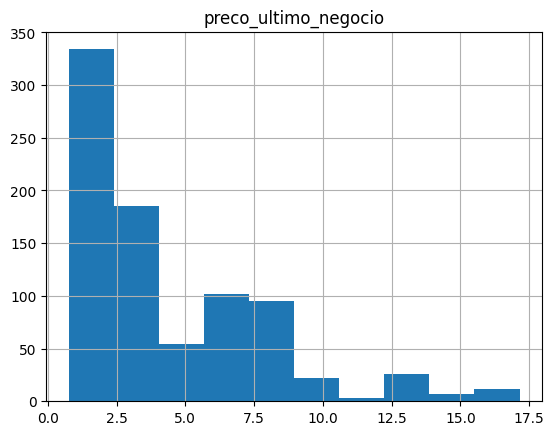

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
 
# Generate random data for the histogram
data = pd.read_csv('../dataset/dados_pregao_dotz3.csv', header=0, parse_dates=True)
data = data[['data_pregao', 'preco_ultimo_negocio']]
data.set_index(['data_pregao'], inplace=True)
 
data.hist()
plt.show()


             preco_ultimo_negocio
data_pregao                      
2021-05-31                  13.20
2021-06-01                  13.18
2021-06-02                  13.32
2021-06-04                  13.14
2021-06-07                  13.15


<function matplotlib.pyplot.show(close=None, block=None)>

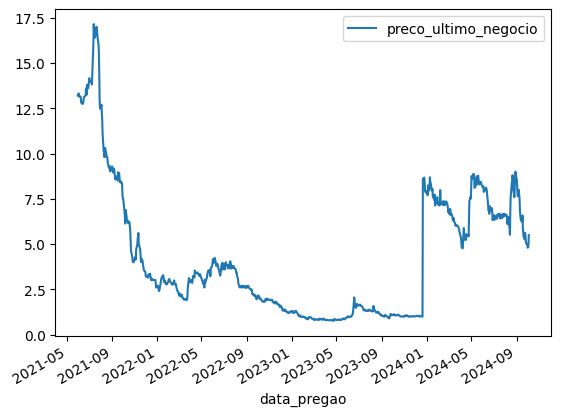

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

data = pd.read_csv('../dataset/dados_pregao_dotz3.csv', header=0, parse_dates=True, index_col=0)
df = data[['preco_ultimo_negocio']]
print(df.head())
df.plot()
pyplot.show

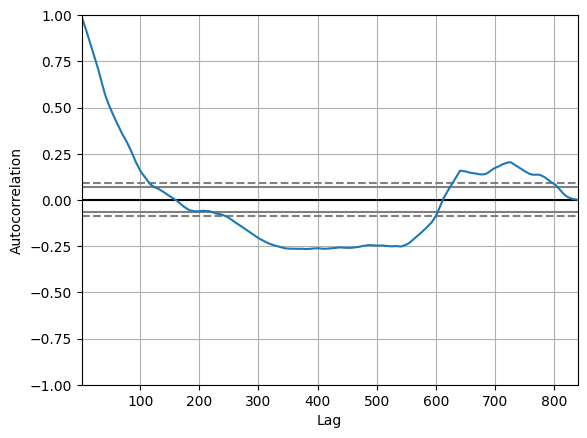

In [6]:
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df)
pyplot.show()

In [7]:
from pmdarima import auto_arima
import warnings

warnings.filterwarnings('ignore')

In [8]:
stepwise_fit = auto_arima(df['preco_ultimo_negocio'], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=615.004, Time=0.98 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=615.288, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=610.180, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=610.139, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=613.870, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=612.132, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=612.128, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=614.136, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=608.632, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=610.622, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=610.617, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=608.664, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=612.631, Time=0.15 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 2.294 seconds


In [1]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from math import sqrt

X = df.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = []

# Loop de previsão
for t in range(len(test)):
    model = ARIMA(history, order=(0,1,1))  # Substituir os parâmetros com o melhor modelo de auto_arima
    model_fit = model.fit()

    output = model_fit.forecast()
    yhat = output[0]

    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

# Cálculo do RMSE
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# Plotar os resultados
plt.plot(test, label='Observed')
plt.plot(predictions, color='red', label='Predicted')
plt.legend()
plt.show()


NameError: name 'df' is not defined

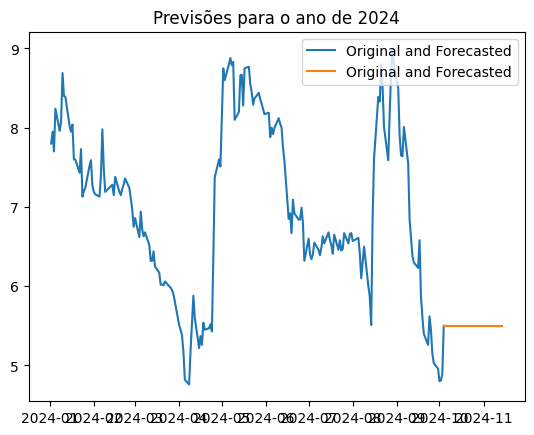

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Preparar o modelo ARIMA e fazer as previsões para os próximos 30 dias
X = df.values
history = [x for x in X]
model = ARIMA(history, order=(0,1,1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=30)

# Gerar datas futuras
last_date = df.index[-1]
future_dates = pd.date_range(last_date, periods=30, freq='B')

# Adicionar previsões ao DataFrame
forecast_df = pd.DataFrame(forecast, index=future_dates, columns=['Forecast'])
df_with_forecast = pd.concat([df, forecast_df])

# Filtrar os dados apenas para o ano de 2024
df_2024 = df_with_forecast.loc['2024']

# Plotar os dados de 2024
plt.plot(df_2024, label='Original and Forecasted')
plt.legend()
plt.title('Previsões para o ano de 2024')
plt.show()